## Description
> 该项目基于约会人员的分类数据，调用sklearn类库进行分类， 重点联系机器学习项目处理数据的流程
>
> 我的朋友艾伦一直使用在线的约会网站寻找合适的约会对象，尽管约会网站会推荐不同的人选， 但她并不喜欢每一个人，经过一番总结，她交往过三种类型的人
>> * 不喜欢的人
>> * 魅力一般的人
>> * 极具魅力的人
> 
> 尽管发现了上述规律， 但是艾伦仍无法将约会网站推荐的匹配对象归入恰当的类别，请你根据给定的数据进行分析， 帮助艾伦把新的匹配对象划分到确切的类中
>
> 基于sklearn库

### 1. 导入相应的包 

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

### 2. 获取数据
> 艾伦收集了一些约会数据，将这些数据保存到了datingSet.txt中，每个样本数据占据一行， 总共1000行。艾伦的样本主要包含下面的特征：
>> * 每年获得的飞行常客里程数
>> * 玩视频游戏所耗时间百分比
>> * 每周消费的冰激凌公升数
>
> 首先，需要将这些数据解析成可用的numpy解析程序

In [14]:
# 从文件中读取数据，然后转换成DataFrame
filename = "datingTestSet2.txt"
data = []
with open(filename, "r") as fr:
    for line in fr:
        line = line.strip().split("\t")
        data.append(line)

names = ['ffMiles','percentTats', 'iceCream', 'labels']
dataset = pd.DataFrame(data, columns=names)
print(dataset.head())
print(dataset.describe())
print(dataset.info())
print(dataset.shape)

  ffMiles percentTats  iceCream labels
0   40920    8.326976  0.953952      3
1   14488    7.153469  1.673904      2
2   26052    1.441871  0.805124      1
3   75136   13.147394  0.428964      1
4   38344    1.669788  0.134296      1
       ffMiles percentTats  iceCream labels
count     1000        1000      1000   1000
unique     990         940      1000      3
top          0    0.000000  1.624296      1
freq         5          61         1    342
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
ffMiles        1000 non-null object
percentTats    1000 non-null object
iceCream       1000 non-null object
labels         1000 non-null object
dtypes: object(4)
memory usage: 31.3+ KB
None
(1000, 4)


### 3. 分离评估数据集 

In [87]:
## array = dataset.values
X = array[:, 0:3].astype(float)
Y = array[:, 3]
validation_value = 0.2
seed = 5
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_value, random_state=seed) 

###  4. 评估模型

In [88]:
# 评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'

models = {}
models['KNN'] = KNeighborsClassifier()
models['SVM'] = SVC()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()

# 评估
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("{} : {} ({})".format(key, cv_result.mean(), cv_result.std()))

KNN : 0.7949999999999999 (0.06254998001598401)
SVM : 0.35875 (0.0344827855603343)
CART : 0.9412499999999999 (0.023082731640774245)
NB : 0.9349999999999999 (0.014577379737113235)


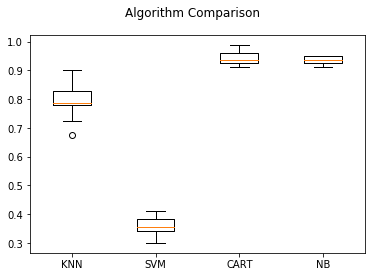

'从上面可以看出，决策树和朴素贝叶斯算法效果好一些， 支持向量机表现效果差，可能是数据没有标准化的原因，我们下面对数据\n进行标准化之后，统一再比较，使用自动处理流程'

In [89]:
# 评估算法 --- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

"""从上面可以看出，决策树和朴素贝叶斯算法效果好一些， 支持向量机表现效果差，可能是数据没有标准化的原因，我们下面对数据
进行标准化之后，统一再比较，使用自动处理流程"""

ScalerKNN : 0.9487499999999999 (0.021250000000000005)
ScalerSVM : 0.9549999999999998 (0.025124689052802223)
ScalerCART : 0.9475 (0.02222048604328897)
ScalerNB : 0.93625 (0.014197270864500672)


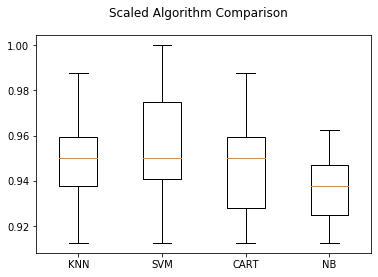

'经过特征缩放之后，还是SVM和KNN比较好，下面就从这两个模型中进行进一步的改进'

In [91]:
# 标准化处理数据
pipelines = {}
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("{} : {} ({})".format(key, cv_result.mean(), cv_result.std()))

# 箱线图
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()


"""经过特征缩放之后，还是SVM和KNN比较好，下面就从这两个模型中进行进一步的改进"""

### 4. 优化模型
> * 算法调参
> * 集成算法

#### 4.1 算法调参 

In [101]:
# 算法调参 --- KNN
rescaledX = MinMaxScaler().fit_transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7,  9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print("最优:{}  使用 {}".format(grid_result.best_score_, grid_result.best_params_))

# cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']) 
# for mean, std, param in cv_results:
#     print('%f (%f) with %r' % (mean, std, param))


"""最好的k是11"""

最优:0.95875  使用 {'n_neighbors': 11}


'最好的k是11'

In [93]:
# 算法调参 --- SVM
rescaledX = StandardScaler().fit_transform(X_train)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print("最优:{}  使用 {}".format(grid_result.best_score_, grid_result.best_params_))

# cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']) 
# for mean, std, param in cv_results:
#     print('%f (%f) with %r' % (mean, std, param))

    
"""关于SVM的最优参数 C=2.0  kernel = rbf"""

最优:0.96  使用 {'C': 1.5, 'kernel': 'rbf'}


'关于SVM的最优参数 C=2.0  kernel = rbf'

#### 4.2 集成算法
> 除了调参， 提高算法准确度的方法是集成算法。 下面对四种集成算法进行比较，进一步提高算法的准确度
>> * 装袋算法： 随机森林(RF)和极端随机树(ET)
>> * 提升算法： AdaBoost(AB) 和随机梯度上升(GBM)

ScaledAB: 0.798750 (0.042001)
ScaledGBM: 0.955000 (0.021794)
ScaledRF: 0.952500 (0.015612)
ScaledET: 0.952500 (0.020767)


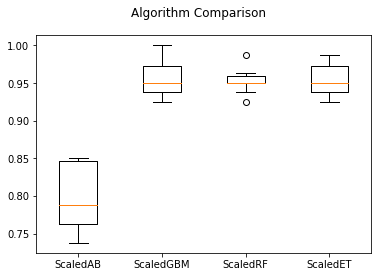

'随机梯度上升也许值得进一步分析， 因为具有良好的准确度，并且数据比较紧凑'

In [94]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

# 集成算法 --- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

"""随机梯度上升也许值得进一步分析， 因为具有良好的准确度，并且数据比较紧凑"""


In [96]:
# 集成算法调参 --- GBM
rescaledX = StandardScaler().fit_transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}

model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优： %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

"""最优参数200个分类器的效果比较好"""

最优： 0.9575 使用 {'n_estimators': 50}
0.947500 (0.020000) with {'n_estimators': 10}
0.957500 (0.018708) with {'n_estimators': 50}
0.955000 (0.021794) with {'n_estimators': 100}
0.955000 (0.023184) with {'n_estimators': 200}
0.952500 (0.023585) with {'n_estimators': 300}
0.953750 (0.023083) with {'n_estimators': 400}
0.953750 (0.023083) with {'n_estimators': 500}
0.953750 (0.023083) with {'n_estimators': 600}
0.953750 (0.023083) with {'n_estimators': 700}
0.953750 (0.023083) with {'n_estimators': 800}
0.953750 (0.023083) with {'n_estimators': 900}


'最优参数200个分类器的效果比较好'

###  确定最终模型
> 通过前面对算法的评估发现 支持向量机具有最佳的准确度。 所以将会用支持向量机（SVM）, 通过训练集数据生成算法模型， 并通过预留的评估数据集
来评估模型。 在算法评估过程中， 支持向量机SVM对正态化的数据具有较高的准确度。所以对训练集做正态化处理， 对评估数据集也做相同的处理。

In [103]:
# 模型最终化
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
#model = KNeighborsClassifier(n_neighbors=11)
model = GradientBoostingClassifier(n_estimators=50)
model.fit(rescaledX, Y_train)

# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)

#  书上的评估方式，最后用向量机处理完毕之后，误差是0.7
errorCount = 0.0
for i in range(len(predictions)):
    print("the classifier came back with: {}, the real answer is: {}".format(predictions[i], Y_validation[i]))
    if (predictions[i] != Y_validation[i]):
        errorCount += 1.0
print("the total error rate is : {}".format(errorCount/float(len(predictions))))  

# 评估算法模型
# print("accuracy_score\n",accuracy_score(Y_validation, predictions))
# print("\nconfusion_matrix\n", pd.DataFrame(confusion_matrix(Y_validation, predictions),columns=np.unique(Y_validation), index=np.unique(Y_validation)))
# print("\nclassification_report\n", classification_report(Y_validation, predictions))

the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answe

### 总结：
> 这次通过机器学习实战的第一个约会人员分类的项目，又学习了一遍sklearn机器学习的过程，下面在总结一下框架
> * 定义问题
>> * 导入包
>> * 导入数据集（可能是txt格式的，就需要转换成numpy可以解析的数据）
> * 查看数据
>> * 查看数据的一般特性，形状shape，浏览head()，基本的统计特征describe()， info()看是否有缺失值， 如果有缺失值，再处理
>> * 通过图标可视化特征，包括一维数据可视化和多维之间的相关性
>>> * 一维数据可视化 hist(), 密度分布图
>>> * 多维数据相关性 相关矩阵
> * 数据集处理
>> * 划分数据集
>> * 归一化(StandardScaler()、MinMaxScaler())
> * 评估模型
>> * 建立一些模型， 然后k交叉验证
>> * 创建箱线图， 观察，调出两三种效果比较好的
> * 优化模型
>> * 模型调参
>> * 集成算法（随机森林，AdaBoost， 梯度上升， 极端随机树）
> * 确定最终模型，进行预测和评估